Dans un premier temps, importons notre jeu de données. Prenons garde à utiliser le dataset d'entraînement pour ne pas fausser les prévisions. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

df=pd.read_csv('train_data.csv')
df.head()

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
0,4443800785,2014-11-21T00:00:00Z,481000,2,1.00,150.501672,360.460795,85.470085,65.031587,1.0,...,0,4,7,1924,0,123.560015,360.460795,98117,47.6855,-122.391
1,2722059013,2015-02-04T00:00:00Z,550000,2,1.00,117.985879,4046.822742,117.985879,0.000000,1.0,...,0,4,5,1908,0,173.727239,646.599777,98042,47.3651,-122.165
2,8856004730,2014-09-17T00:00:00Z,199950,2,2.75,147.714604,1943.236715,147.714604,0.000000,1.5,...,0,3,5,1920,0,121.701970,557.413601,98001,47.2786,-122.250
3,2473003210,2015-03-13T00:00:00Z,364808,3,1.75,215.533259,731.605351,150.501672,65.031587,1.0,...,0,3,8,1967,0,184.875511,903.010033,98058,47.4524,-122.146
4,6743700335,2014-06-04T00:00:00Z,470000,3,2.00,167.224080,1176.978818,167.224080,0.000000,1.0,...,0,3,7,1956,1990,183.017466,908.119658,98033,47.6935,-122.173


In [2]:
df.describe()

,id,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
count,1.714700e+04,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000
mean,4.605475e+09,5.431939e+05,3.371669,2.123010,193.732114,1411.998121,166.652667,27.079448,1.497638,0.008048,0.235376,3.409343,7.668630,1971.154721,86.124453,184.852674,1187.418834,98077.654808,47.560131,-122.213735
std,2.879726e+09,3.716087e+05,0.932029,0.772906,85.587837,3879.062125,77.312579,41.221029,0.542015,0.089352,0.767578,0.649535,1.181903,29.378196,405.556968,64.023277,2504.936376,53.455894,0.138478,0.140614
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.941657,48.309179,26.941657,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,37.068004,61.222594,98001.000000,47.155900,-122.519000
25%,2.126059e+09,3.230000e+05,3.000000,1.750000,132.850242,468.227425,111.482720,0.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.500000,0.000000,138.424378,473.801561,98033.000000,47.472300,-122.328000
50%,3.905120e+09,4.500000e+05,3.000000,2.250000,178.372352,706.150130,145.856559,0.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,170.940171,707.822371,98065.000000,47.572000,-122.230000
75%,7.339452e+09,6.460000e+05,4.000000,2.500000,236.900780,992.985879,206.243032,52.025269,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,219.249350,936.780007,98117.000000,47.678100,-122.124500
max,9.900000e+09,7.062500e+06,33.000000,7.750000,932.738759,153414.994426,823.114084,447.788926,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,576.923077,80936.454849,98199.000000,47.777600,-121.315000


Le dataframe est un tableau de 21 colonnes et 17147 lignes. La target est le prix du logement. Il contient des variables continues et des variables discrètes.["prix","id","date","zipcode","lat",'long']

In [22]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("train_data.csv")  

# Pour les variables explicatives, j'ai supprimé toutes celles jugées difficiles à traiter 
X = df.drop(columns=["prix","id","date","zipcode","lat",'long'])  # Variables explicatives
y = df["prix"]  # Target

# Train/test avec 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline : peremet d'imputer les valeurs manquantes avec la moyenne, standardise les valeurs (moyenne 0 e-t 1), sélection des 
# variables les plus pertinentes et regression linéaire imposée par le sujet
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Remplace les NaNs par la moyenne
    ("scaler", StandardScaler()),  # Standardisation
    ("feature_selection", SelectKBest(score_func=f_regression, k=5)),  # Sélection de features
    ("model", LinearRegression())  # Régression linéaire
])

# Entraînement 
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Calcul du RMSE comme demandé dans le sujet et r2 car parlant 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE du modèle : {rmse:.2f}")
print(f"R² du modèle : {r2:.3f}")

# GridSearchCV pour optimiser la sélection de variables et le modèle
param_grid = {
    "feature_selection__k": [3, 5, 7],  # Tester différentes sélections de variables
    "model__fit_intercept": [True, False] # Ajout de biais ou non 
}

# Recherche du RMSE minimum avec validation croisée 
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et scores optimisés
best_rmse = -grid_search.best_score_  #  Inversion car GridSearchCV retourne une valeur négative
best_r2 = grid_search.best_estimator_.score(X_test, y_test)  # Score R² du meilleur modèle

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur RMSE en validation croisée : {best_rmse:.2f}")
print(f"R² du meilleur modèle : {best_r2:.3f}")



RMSE du modèle : 246213.53
R² du modèle : 0.561
Meilleurs paramètres : {'feature_selection__k': 7, 'model__fit_intercept': True}
Meilleur RMSE en validation croisée : 241091.70
R² du meilleur modèle : 0.585


[ 2194  4389  6583  8778 10973]


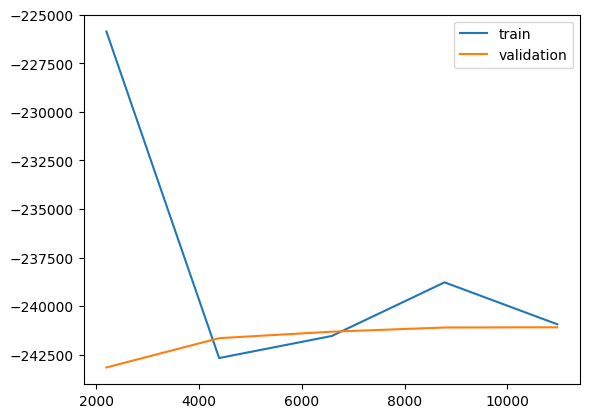

In [27]:
from sklearn.model_selection import learning_curve
N,train_score,val_score =learning_curve(grid_search,X_train,y_train, train_sizes=np.linspace(0.2,1,5),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.legend()

Autre modèle avec XGBoost.

In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Charger les données
df = pd.read_csv("train_data.csv")

# Séparer les features et la cible
X = df.drop(columns=["prix","id","date","zipcode","lat",'long'])
y = df["prix"]

# Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline amélioré
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("feature_selection", SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ("model", xgb.XGBRegressor(objective="reg:squarederror", n_estimators=200, learning_rate=0.1))
])

# Optimisation des hyperparamètres
param_grid = {
    "model__n_estimators": [100, 200, 500],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleur modèle et prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"RMSE optimisé : {rmse:.2f}")
print(f"R² optimisé : {r2:.3f}")


Meilleurs paramètres : {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
RMSE optimisé : 208664.29
R² optimisé : 0.684
